# 🏠 House Price Prediction in California using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.datasets import fetch_california_housing

In [78]:
# Load Dataset

california = fetch_california_housing()

# Convert Dataset to DataFrame

X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedHouseValue")

# Show Data
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [79]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [80]:
# Basic Info

print("\nBasic Info: \n")
print(X.info())
print(y.info())


Basic Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseValue
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


In [81]:
# check missing values

print("\nMissig Values Before Imputation: \n")
X.isnull().sum()


Missig Values Before Imputation: 



,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


Observations as far:


* All **20640 records** are complete across all columns
* We found **zero missing values** in the dataset.
* All features are **"float type"**
* **No encoding methods** like one-hot encoding or label encoding are required.


In [82]:
# Statistical Analysis

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [83]:
for col in X.columns:
  unique_values = X[col].unique()
  print("\nFeature                : ", col)
  print("Unique Values          : ", unique_values)
  print("Number of Unique Values: ", len(unique_values))


Feature                :  MedInc
Unique Values          :  [8.3252 8.3014 7.2574 ... 2.3598 2.3661 2.0943]
Number of Unique Values:  12928

Feature                :  HouseAge
Unique Values          :  [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]
Number of Unique Values:  52

Feature                :  AveRooms
Unique Values          :  [6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]
Number of Unique Values:  19392

Feature                :  AveBedrms
Unique Values          :  [1.02380952 0.97188049 1.07344633 ... 1.14825581 1.17191977 1.16226415]
Number of Unique Values:  14233

Feature                :  Population
Unique Values          :  [ 322. 2401.  496. ... 3060. 2707. 6912.]
Number of Unique Values:  3888

Feature                :  AveOccup
Unique Values          :  [2.55555556 2.10984183 2.

# Observations so far:

* Majority of features have numerical and continuous dataset.
* No features should be trated as categorical.
* Dataset is well suited for regression modeling.
* Each observation represents a unique data points.

In [84]:
# check duplicates

print("Number of Duplicated Values: ", X.duplicated().sum())

Number of Duplicated Values:  0


In [85]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [86]:
zero_X= X[X == 0]
print("Total Zero Values in X: \n")
print(zero_X.sum())

Total Zero Values in X: 

MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
dtype: float64


# Observations:

* The dataset contains no duplicate rows.
* All observations have non-zero values.
* Now, we need to check the outliers and skewness of each features.

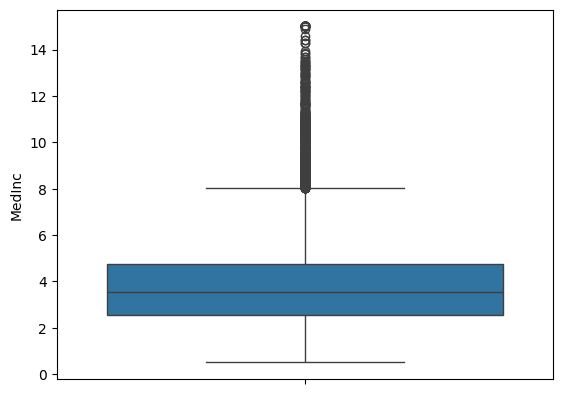

In [87]:
# check for outliers in the dataset

sns.boxplot(X["MedInc"])
plt.show()

In [88]:
Q1 = X["MedInc"].quantile(0.25)
Q3 = X['MedInc'].quantile(0.75)
IQR = Q3-Q1

lower_bond_medInc = Q1 - 1.5 * IQR
upper_bond_medInc = Q3 + 1.5 * IQR

iqr_outliers_med_Inc = X[
    (X['MedInc'] < lower_bond_medInc) |
    (X['MedInc'] > upper_bond_medInc)
]
iqr_outliers_med_Inc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20
...,...,...,...,...,...,...,...,...
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80
20428,8.7288,6.0,8.715842,1.102970,3385.0,3.351485,34.23,-118.83
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69


Remove IQR Outliers

In [89]:
medInc_iqr_clean = X[
    (X["MedInc"] >= lower_bond_medInc) &
    (X["MedInc"] <= upper_bond_medInc)
]

medInc_iqr_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [90]:
print("Skewness of MedInc: ", medInc_iqr_clean['MedInc'].skew())

Skewness of MedInc:  0.5680444848174154


Highly Skewed Data

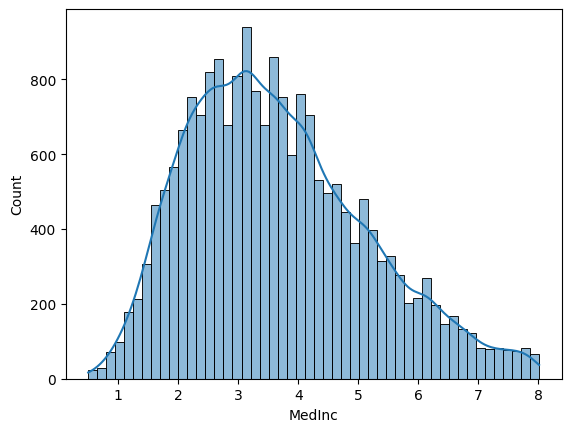

In [91]:
sns.histplot(medInc_iqr_clean['MedInc'], kde=True)
plt.show()

In [92]:
medInc_iqr_clean['MedInc'] = np.sqrt(medInc_iqr_clean['MedInc'])

/tmp/ipython-input-3055970837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medInc_iqr_clean['MedInc'] = np.sqrt(medInc_iqr_clean['MedInc'])


In [93]:
print("The Skewness of MedInc: ", medInc_iqr_clean['MedInc'].skew())

The Skewness of MedInc:  0.09399245068528292


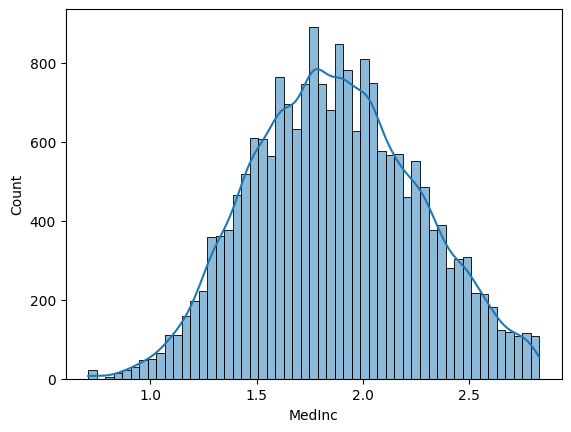

In [94]:
sns.histplot(medInc_iqr_clean['MedInc'], kde=True)
plt.show()

# Observation so far:

* From the cleaned dataset, outliers were identified in the MedInc feature using a boxplot.
* The Interquartile Range (IQR) method was applied to quantify the outliers.
* A total of 681 outliers were detected in the MedInc feature.
* These outliers were removed from the dataset to reduce extreme value influence.
* After outlier removal, the skewness of MedInc was 0.568, indicating moderate right skewness.
* To reduce skewness, a square root transformation was applied.
* After transformation, the skewness reduced to 0.093, which is close to zero.
* Distribution shape was verified using histogram and KDE plots.
* The transformed MedInc feature now follows an approximately normal distribution.

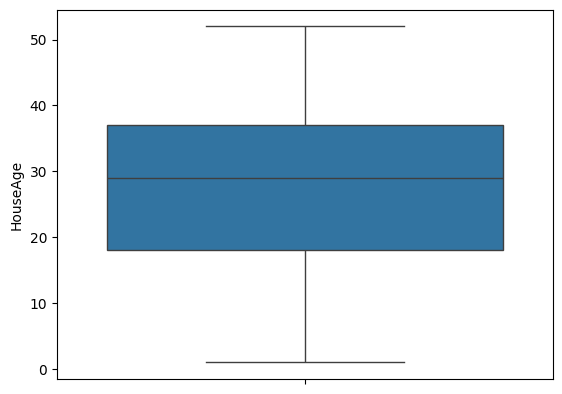

In [95]:
# Check the outliers of "HouseAge"

sns.boxplot(X["HouseAge"])
plt.show()

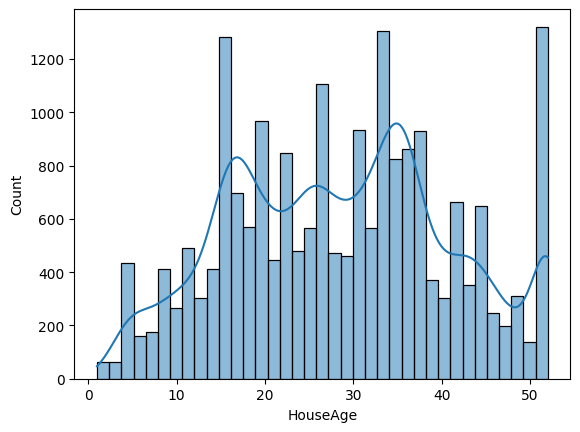

In [96]:
sns.histplot(X["HouseAge"], kde=True)
plt.show()

In [97]:
print("The Skewness of HouseAge: ", X["HouseAge"].skew())

The Skewness of HouseAge:  0.060330637599136865


### Observations:

* No outliers were detected in the HouseAge feature.
* The distribution of HouseAge is approximately normal.
* The skewness value is 0.06, indicating negligible skewness.
* No transformation is required for this feature.

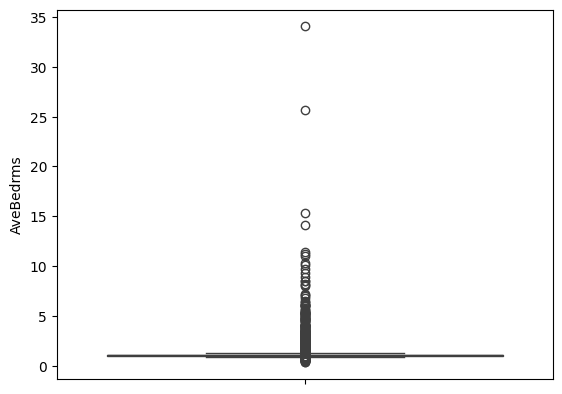

In [98]:
# Check outliers of AveBedrms

sns.boxplot(X["AveBedrms"])
plt.show()

In [99]:
# Find the total count of Outliers with IQR Method

Q1 = X["AveBedrms"].quantile(0.25)
Q3 = X['AveBedrms'].quantile(0.75)
IQR = Q3-Q1

lower_bond_AveBedrms = Q1 - 1.5 * IQR
upper_bond_AveBedrms = Q3 + 1.5 * IQR

iqr_outliers_AveBedrms = X[
    (X["AveBedrms"] < lower_bond_AveBedrms) |
    (X["AveBedrms"] > upper_bond_AveBedrms)
]

iqr_outliers_AveBedrms

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29
62,0.9011,50.0,6.229508,1.557377,377.0,3.090164,37.81,-122.29
...,...,...,...,...,...,...,...,...
20423,5.4346,17.0,6.261168,1.505155,578.0,1.986254,34.08,-119.00
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47


In [100]:
X["AveBedrms"].shape

(20640,)

In [101]:
# Remove the Outliers

AveBedrms_iqr_clean = X[
    (X["AveBedrms"] >= lower_bond_AveBedrms) &
    (X["AveBedrms"] <= upper_bond_AveBedrms)
]

AveBedrms_iqr_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20634,3.7125,28.0,6.779070,1.148256,1041.0,3.026163,39.27,-121.56
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


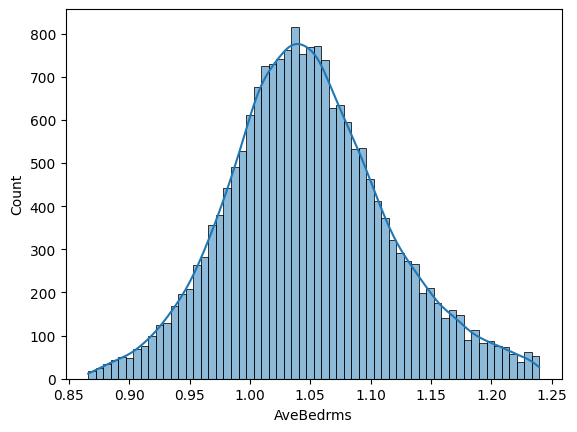

In [102]:
sns.histplot(AveBedrms_iqr_clean["AveBedrms"],kde=True)
plt.show()

In [103]:
print("The Skewness of AveBedrms: ", AveBedrms_iqr_clean["AveBedrms"].skew())

The Skewness of AveBedrms:  0.247344975685831


# Observation so far:

* Outliers were identified in the AveBedrms feature using a boxplot.
* The IQR method detected 1,424 outliers in this feature.
* All identified outliers were removed from the dataset.
* After outlier removal, the skewness of AveBedrms is 0.247, which indicates low skewness.
* Since the skewness is below 0.5, no transformation was required.
* The distribution was verified using histogram and KDE plots.

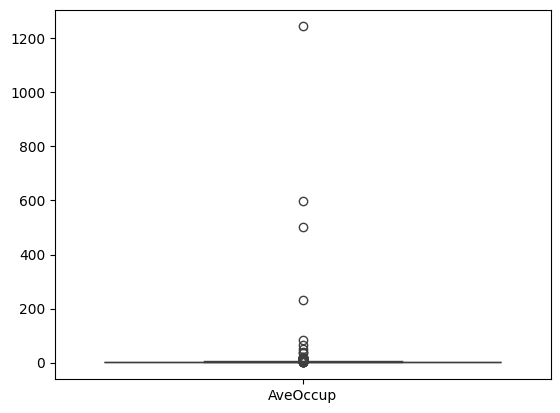

In [104]:
# Check outliers in AveOccup

sns.boxplot(X[["AveOccup"]])
plt.show()

In [105]:
# Find the total count of Outliers with IQR Method

Q1 = X['AveOccup'].quantile(0.25)
Q3 = X['AveOccup'].quantile(0.75)
IQR = Q3 - Q1

lower_bond_AveOccup = Q1 - 1.5 * IQR
upper_bond_AveOccup = Q3 + 1.5 * IQR

iqr_outliers_AveOccup = X[
    (X['AveOccup'] < lower_bond_AveOccup) |
    (X['AveOccup'] > upper_bond_AveOccup)
]

iqr_outliers_AveOccup

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28
92,0.7500,52.0,2.823529,0.911765,191.0,5.617647,37.80,-122.28
200,3.0257,52.0,4.046948,1.009390,994.0,4.666667,37.78,-122.23
270,3.8750,33.0,3.021277,0.659574,575.0,12.234043,37.78,-122.18
...,...,...,...,...,...,...,...,...
20353,5.0066,12.0,3.800000,1.466667,69.0,4.600000,34.13,-119.05
20393,5.7560,16.0,6.117493,1.026110,2007.0,5.240209,34.22,-118.88
20513,2.6250,34.0,5.597403,1.103896,391.0,5.077922,38.67,-121.63
20527,1.4653,7.0,3.525794,1.017857,4479.0,8.886905,38.54,-121.79


In [106]:
#Remove IQR Outliers for AveOccup

AveOccup_iqr_clean = X[
    (X['AveOccup'] >= lower_bond_AveOccup) &
    (X['AveOccup'] <= upper_bond_AveOccup)
]

AveOccup_iqr_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [107]:
AveOccup_iqr_clean['AveOccup'].skew()

np.float64(0.3373008656645868)

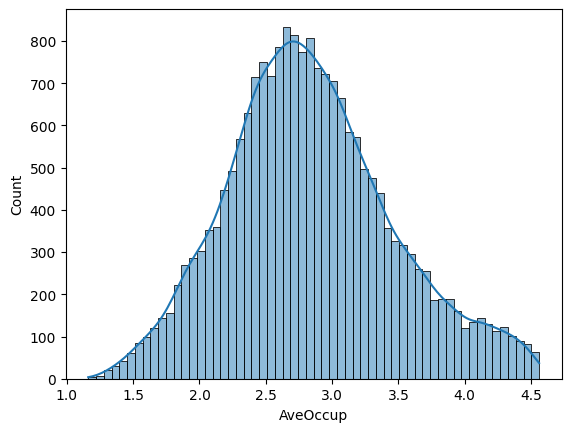

In [108]:
sns.histplot(AveOccup_iqr_clean['AveOccup'],kde=True)
plt.show()

# Observation So Far:

* Outliers were detected in the AveOccup feature using a boxplot.
* The IQR method identified 771 outliers in this feature.
* All detected outliers were removed from the dataset.
* After outlier removal, the skewness of AveOccup is 0.33, indicating low skewness.
* Since the skewness is below 0.5, no transformation was required.
* The distribution was validated using histogram and KDE plots.
* The AveOccup feature now exhibits an approximately normal, bell-shaped distribution.

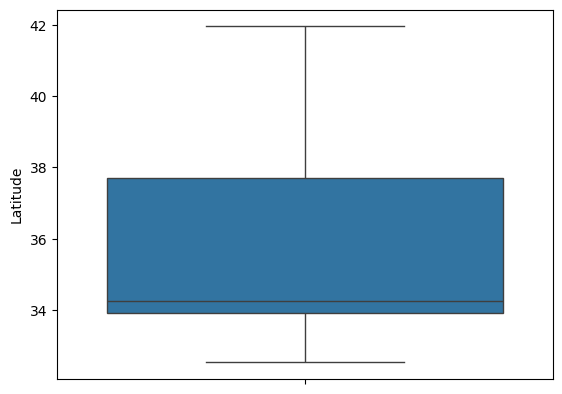

In [109]:
# Check Outliers in Latitude

sns.boxplot(X["Latitude"])
plt.show()

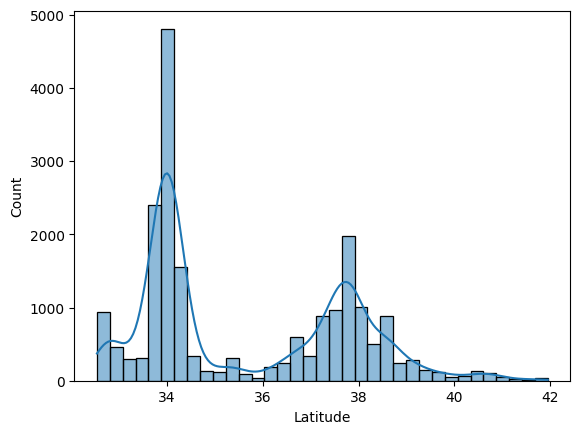

In [110]:
sns.histplot(X["Latitude"], kde=True)
plt.show()

In [111]:
X["Latitude"].skew()

np.float64(0.46595300370997006)

# Observation So Far:

* All relevant features have been examined for missing values, duplicates, outliers, and skewness.
* Necessary outlier removal and transformations have been applied where required.
* Feature distributions are now stable and suitable for modeling.
* The dataset is fully cleaned and ready for model training.
* The next step is feature selection to identify the most relevant variables for model training and prediction.

# Feature Selection

### Model Selection for Prediction

* To evaluate predictive performance, five different regression models will be tested.
* The selected models are:
  1. Linear Regression
  2. Decision Tree Regressor
  3. Random Forest Regressor
  4. Gradient Boosting Regressor
  5. Support Vector Regressor (SVR)
* Using multiple models allows comparison between linear and non-linear approaches.
* Model performance will be evaluated using appropriate regression metrics.

# 1. Linear Regression

In [112]:
# X = pd.DataFrame(california.data, columns=california.feature_names)
# y = pd.Series(california.target, name="MedHouseValue")

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
print("Slope (m): ", model.coef_[0])
print("Intercept (c): ", model.intercept_)

Slope (m):  0.44867490966571666
Intercept (c):  -37.02327770606409


In [116]:
y_pred = model.predict(X_test)

In [117]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 SCORE: ", r2)

MAE:  0.5332001304956553
MSE:  0.5558915986952444
RMSE:  0.7455813830127764
R2 SCORE:  0.5757877060324508


### Observation:
* R² = 0.576, explains 57.6% of variance.
* MAE = 0.533, RMSE = 0.746.
* Captures only linear relationships; underfits the data.
* Serves as a baseline model.

# 2. Decision Tree Regressor

In [118]:
dt = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [119]:
dt_y_pred = dt.predict(X_test)

In [120]:
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)

print("Decision Tree Regressor MAE      :", dt_mae)
print("Decision Tree Regressor MSE      :", dt_mse)
print("Decision Tree Regressor RMSE     :", dt_rmse)
print("Decision Tree Regressor R2 SCORE :", dt_r2)

Decision Tree Regressor MAE      : 0.5222592972077786
Decision Tree Regressor MSE      : 0.5245146178314735
Decision Tree Regressor RMSE     : 0.7242338143386247
Decision Tree Regressor R2 SCORE : 0.5997321244428706


### Observation:

* R² = 0.599, slightly better than Linear Regression.
* MAE = 0.522, RMSE = 0.724.
* Captures non-linear patterns but may overfit single trees.
* Useful as a simple non-linear benchmark.

# 3. Random Forest Model

In [121]:
rf = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [122]:
rf_y_pred = rf.predict(X_test)

# Model Evaluatiom

In [123]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest MAE      :", rf_mae)
print("Random Forest MSE      :", rf_mse)
print("Random Forest RMSE     :", rf_rmse)
print("Random Forest R2 SCORE :", rf_r2)

Random Forest MAE      : 0.4903346204841169
Random Forest MSE      : 0.4627451601351979
Random Forest RMSE     : 0.6802537468733252
Random Forest R2 SCORE : 0.6468696660210695


### Observations:

* R² = 0.646, shows improved variance explanation.
* MAE = 0.490, RMSE = 0.680.
* Reduces overfitting compared to a single tree.
* Strong ensemble baseline; better generalization

# 4. Gradient Boosting Regressor

In [124]:
gb = GradientBoostingRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=50, random_state=42)

In [125]:
gb_y_pred = gb.predict(X_test)

In [126]:
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Random Forest MAE      :", gb_mae)
print("Random Forest MSE      :", gb_mse)
print("Random Forest RMSE     :", gb_rmse)
print("Random Forest R2 SCORE :", gb_r2)

Random Forest MAE      : 0.35526437591243876
Random Forest MSE      : 0.27511870474905403
Random Forest RMSE     : 0.5245175924114024
Random Forest R2 SCORE : 0.7900512669576067


### Observations:

* R² = 0.790, explains 79% of variance.
* MAE = 0.355, RMSE = 0.525; lowest error among all models.
* Effectively captures complex, non-linear relationships.
* Best performing model.

# 5. Support Vector Regressor (SVR)

In [127]:
svr = SVR(
  kernel='rbf',
    C=1.0,
    epsilon=0.1
)
svr.fit(X_train, y_train)

SVR()

In [128]:
svr_y_pred = svr.predict(X_test)

In [129]:
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(gb_mse)
svr_r2 = r2_score(y_test, svr_y_pred)

print("SVR MAE      :", svr_mae)
print("SVR MSE      :", svr_mse)
print("SVR RMSE     :", svr_rmse)
print("SVR R2 SCORE :", svr_r2)

SVR MAE      : 0.8599506583445761
SVR MSE      : 1.3320115421348744
SVR RMSE     : 0.5245175924114024
SVR R2 SCORE : -0.01648536010717372


### Observations:

* R² = -0.016, fails to explain variance.
* MAE = 0.860, MSE = 1.332, RMSE = 1.154.
* Performs worse than predicting the mean.

In [130]:
print("Linear Regression MAE            :", mae)
print("Linear Regression MSE            :", mse)
print("Linear Regression RMSE           :", rmse)
print("Linear Regression R2 SCORE       :", r2)

print("\nDecision Tree Regressor MAE      :", dt_mae)
print("Decision Tree Regressor MSE      :", dt_mse)
print("Decision Tree Regressor RMSE     :", dt_rmse)
print("Decision Tree Regressor R2 SCORE :", dt_r2)

print("\nRandom Forest MAE                :", rf_mae)
print("Random Forest MSE                :", rf_mse)
print("Random Forest RMSE               :", rf_rmse)
print("Random Forest R2 SCORE           :", rf_r2)

print("\nGradient Boosting MAE                :", gb_mae)
print("Gradient Boosting MSE                :", gb_mse)
print("Gradient Boosting RMSE               :", gb_rmse)
print("Gradient Boosting R2 SCORE           :", gb_r2)

print("\nSVR MAE                          :", svr_mae)
print("SVR MSE                          :", svr_mse)
print("SVR RMSE                         :", svr_rmse)
print("SVR R2 SCORE                     :", svr_r2)

Linear Regression MAE            : 0.5332001304956553
Linear Regression MSE            : 0.5558915986952444
Linear Regression RMSE           : 0.7455813830127764
Linear Regression R2 SCORE       : 0.5757877060324508

Decision Tree Regressor MAE      : 0.5222592972077786
Decision Tree Regressor MSE      : 0.5245146178314735
Decision Tree Regressor RMSE     : 0.7242338143386247
Decision Tree Regressor R2 SCORE : 0.5997321244428706

Random Forest MAE                : 0.4903346204841169
Random Forest MSE                : 0.4627451601351979
Random Forest RMSE               : 0.6802537468733252
Random Forest R2 SCORE           : 0.6468696660210695

Gradient Boosting MAE                : 0.35526437591243876
Gradient Boosting MSE                : 0.27511870474905403
Gradient Boosting RMSE               : 0.5245175924114024
Gradient Boosting R2 SCORE           : 0.7900512669576067

SVR MAE                          : 0.8599506583445761
SVR MSE                          : 1.3320115421348744
SVR RM

### Observations:

* From the all models, Gradient Boosting Rgrssor has 79% of R2 Score.
* Which has lowest error across all metrics.
* SVR has highest error across all models (MAE = 0.85, MSE = 1.33).

# Conclusion:

* The dataset contains strong non-linear relationships.
* Ensemble tree-based models significantly outperform linear methods.
* **Gradient Boosting Regressor** should be selected for final prediction, and which is the best performing algorithm from the all algorithms.
* SVR is the worst performing algorithm, which requires re-tuning or removal because it got -0.016 R2 Score, and it has the heighest errors accross all models..